
This is a fun but challenging problem set. It will test your python skills, as well as your understanding of the material in class and in the readings. Start early and debug often! Some notes:

* Part 1 is meant to be easy, so get through it quickly.
* Part 2 (especially 2.1) will be difficult, but it is the lynchpin of this problem set to make sure to do it well and understand what you've done. If you find your gradient descent algorithm is taking more than a few minutes to complete, debug more, compare notes with others, and go to the Lab sessions (especially the sections on vectorized computation and computational efficiency).
* Depending on how well you've done 2.1, parts 2.3 and 4.3 will be relatively painless or incredibly painful. 

* Part 4 (especially 4.3) will be computationally intensive. Don't leave this until the last minute, otherwise your code might be running when the deadline arrives.

* Do the extra credit problems last. This can help you increase your scores

---

## Introduction to the assignment

As with the last assignment, you will be using the [Boston Housing Prices Data Set](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).

In [79]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn
import time

%matplotlib inline  
import matplotlib.pyplot as plt  
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf


In [2]:
data = np.loadtxt('data.txt')
target = np.loadtxt('target.txt')
boston = pd.DataFrame(data)
boston.columns= ["CRIM", "ZN", "INDUS", "CHAS", "NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]
boston['MEDV'] = target

---

## Part 1: Getting oriented


### 1.1 Use existing libraries

Soon, you will write your own gradient descent algorithm, which you will then use to minimize the squared error cost function.  First, however, let's use the canned versions that come with Python, to make sure we understand what we're aiming to achieve.

Using the same Boston housing prices dataset, use the [Linear Regression class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from sklearn or the [OLS class](http://wiki.scipy.org/Cookbook/OLS) from SciPy to explore the relationship between median housing price and number of rooms per house. Do the following:

(a) Regress the housing price on the number of rooms per house. Draw a scatter plot of housing price (y-axis) against rooms (x-axis), and draw the regression line in blue.  You might want to make the dots semi-transparent if it improves the presentation of the figure. 

(b) Regress the housing price on the number of rooms per house and the (number of rooms per house) squared.  Show the (curved) regression line in green. 

(c) Interpret your results.

In [8]:
regr_1 = LinearRegression()
regr_1.fit(boston[['RM']], boston['MEDV'])
r_1 = regr_1.score(boston[['RM']], boston['MEDV'])

print('First regression')
print('Coefficient: {:.2f}'.format(regr_1.coef_[0]))
print('Intercept: {:.2f}'.format(regr_1.intercept_))
print('R squared: {:.2f}'.format(r_1))

First regression
Coefficient: 8.96
Intercept: -35.58
R squared: 0.47


In [43]:
x = boston['RM'].values
X = sm.add_constant(x)
y = boston['MEDV'].values
ols = sm.OLS(y, X)
ols_result = ols.fit()
print('First regression')
print('The intercept : {}'.format(ols_result.params[0]))
print('The co-efficient : {}'.format(ols_result.params[1]))

First regression
The intercept : -35.576206874519855
The co-efficient : 8.959927212241066


In the model above the median housing price will increase by roughly $9000 for each additional room in the house

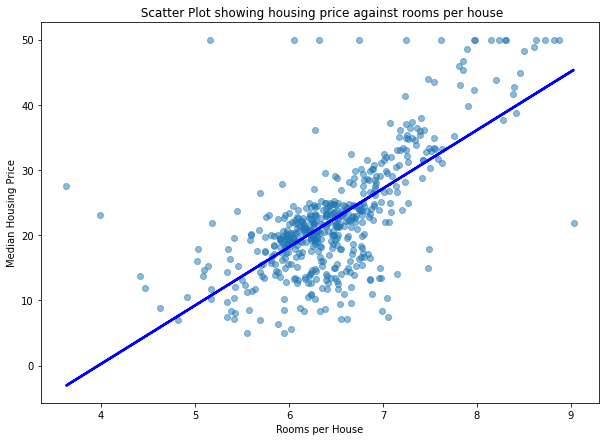

In [44]:
a, b = ols_result.params
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
plt.scatter(x, y, alpha = 0.5)
ax.plot(x, a + b * x, color='blue', lw=2.5)
plt.title(" Scatter Plot showing housing price against rooms per house")
plt.xlabel("Rooms per House")
plt.ylabel("Median Housing Price")
plt.show()

In [45]:
import statsmodels.formula.api as sm

RM = boston.RM
RM_SQ = (RM **2)
model2 = sm.ols(formula = 'MEDV ~  RM + RM_SQ', data = boston).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     294.5
Date:                Tue, 10 May 2022   Prob (F-statistic):           2.19e-85
Time:                        14:23:01   Log-Likelihood:                -1644.1
No. Observations:                 506   AIC:                             3294.
Df Residuals:                     503   BIC:                             3307.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     71.7363     12.865      5.576      0.000      46.460      97.013
RM           -23.7896      3.867     -6.152      0.000     -31.387     -16.192
RM_SQ          2.4691      0.290      8.513      0.000       1.899       3.039
==============================================================================
Omnibus:                       83.768   Durbin-Watson:                   0.715
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              926.703
Skew:                           0.270   Prob(JB):                    5.87e-202
Kurtosis:                       9.608   Cond. No.                     2.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
model2.params

Intercept    71.736328
RM          -23.789603
RM_SQ         2.469145
dtype: float64

In [46]:
w, v, z = model2.params
RM_sorted = RM.sort_values()
RM_SQ_sorted = RM_sorted**2
y_pred = w + v * RM_sorted + z *RM_SQ_sorted

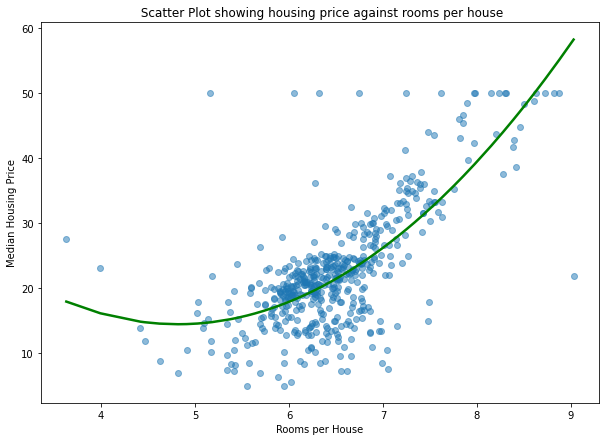

In [47]:
w, v, z = model2.params
fig1 = plt.figure(figsize=(10,7))
ax = fig1.add_subplot(111)
ax.scatter(x, y, alpha = 0.5)
ax.plot(RM_sorted, y_pred, color='green', lw=2.5)
plt.title(" Scatter Plot showing housing price against rooms per house")
plt.xlabel("Rooms per House")
plt.ylabel("Median Housing Price")
plt.show()

- In the bivariate linear regression, we estimate that the median housing price will increase by roughly $9000 for each additional room in the house.*

- *Using the second model, including a quadratic term and a linear term, we observe a quadratic relationship between median housing price and number of rooms which shows that housing price increases more steeply for houses with a greater number of rooms.

- The r squared increases with the addition of the quadratic term. This could reflect that the quadratic term is a more appropriate fit for the data; however, it's also the case that r2 will always increase (on the training set) with an increase in the number and complexity of predictor variables.*

*Enter your observations here*

### 1.2 Training and testing

Chances are, for the above problem you used all of your data to fit the regression line. In some circumstances this is a reasonable thing to do, but often this will result in overfitting. Let's redo the above results the ML way, using careful cross-validation.  Since you are now experts in cross-validation, and have written your own cross-validation algorithm from scratch, you can now take a shortcut and use the libraries that others have built for you.

Using the [cross-validation functions](http://scikit-learn.org/stable/modules/cross_validation.html) from scikit-learn, use 5-fold cross-validation to fit the regression model (a) from 1.1, i.e. the linear fit of housing price on number of rooms per house. Each fold of cross-validation will give you one slope coefficient and one intercept coefficient.  Create a new scatterplot of housing price against rooms, and draw the five different regression lines in light blue, and the oroginal regression line from 1.1 in red (which was estimated using the full dataset). What do you notice?

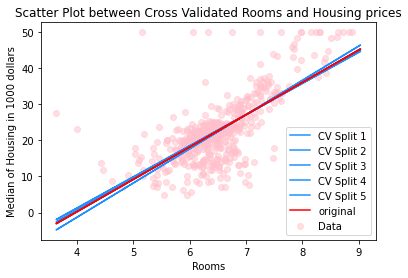

In [59]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

cv_boston = boston.copy()
X = cv_boston.RM
Y = cv_boston.MEDV
kf = KFold(n_splits=5, shuffle=True, random_state=32)

train_id = []
test_id = []
for train, test in kf.split(X):
    train_id.append(train)
    test_id.append(test)
    
coeffs_all = []
intercept_all = []
counter = 1
for i in range(5):
    model = LinearRegression().fit(X[train_id[i]].values.reshape(-1,1), Y[train_id[i]])
    coeffs = model.coef_
#     coeffs_all.append(coeffs)
    intercept = model.intercept_
#     intercept_all.append(intercept)
    plt.plot(x, x* coeffs + intercept, color='dodgerblue',
             label = 'CV Split %i' % counter)
    counter += 1
plt.scatter(x, y, alpha = 0.5, color = 'pink', label = 'Data')
plt.plot(x, a + b * x, color='red', label = 'original')
plt.title("Scatter Plot between Cross Validated Rooms and Housing prices")
plt.xlabel("Rooms")
plt.ylabel("Median of Housing in 1000 dollars")
plt.legend()
plt.show()


Each of the linear regressions estimated on one of the cross-validation splits is very similar to the overall regression line (though not exactly the same). It appears that the variance in both slopes and intercepts is quite small.

*Enter your observations here*

## Part 2: Gradient descent: Linear Regression

This is where it gets fun!

### 2.1 Implement gradient descent with one independent variable (average rooms per house)

Implement the batch gradient descent algorithm that we discussed in class. Use the version you implement to regress the housing price on the number of rooms per house. Experiment with 3-4 different values of the learning rate *R*, and do the following:

* Report the values of alpha and beta that minimize the loss function
* Report the number of iterations it takes for your algorithm to converge (for each value of *R*)
* Report the total running time of your algorithm, in seconds
* How do your coefficients compare to the ones estimated through standard libraries? Does this depend on *R*?

Some skeleton code is provided below, but you should feel free to delete this code and start from scratch if you prefer.

* *Hint 1: Don't forget to implement a stopping condition, so that at every iteration you check whether your results have converged. Common approaches to this are to (a) check to see if the loss has stopped decreasing; and (b) check if both your current parameter esimates are close to the estimates from the previous iteration.  In both cases, "close" should not be ==0, it should be <=epsilon, where epsilon is something very small (like 0.0001).*
* *Hint 2: Some people like to include a MaxIterations parameter in their gradient descent algorithm, to prevent divergence. *

In [15]:
import time

"""
Function
--------
bivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalues, yvalues : narray
    xvalues: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta: float
    co-efficient
"""
def bivariate_ols(xvalues, yvalues, alpha_intitial, beta_intitial, R):
    # initialize the parameters
    start_time = time.time()
    alpha = alpha_intitial
    beta = beta_intitial
    
    n = len(yvalues)
    MaxIterations = 100000
    for i in range(MaxIterations):
        new_alpha = alpha - ((R/n) * np.sum(alpha + beta*xvalues - yvalues))
        new_beta = beta - ((R/n) * np.sum((alpha + beta*xvalues - yvalues)*xvalues))
        
        epsilon=0.00001
        if (np.abs(new_alpha-alpha)<epsilon) and (np.abs(new_beta-beta)<epsilon):
            alpha = new_alpha
            beta = new_beta
            break
        else:
            alpha = new_alpha
            beta = new_beta
    iterations = i+1
    
    if iterations==MaxIterations:
        print("Stopped because maximum number of iterations reached!!!")  
    print("Total Iterations: "+ str(iterations))
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    return alpha, beta


In [16]:

X = boston['RM'].values.copy()
Y = boston['MEDV'].values.copy()

print('When R is 0.01 ')
alpha,beta = bivariate_ols(X, Y, 20, 3, 0.01)
print('The value for alpha is {:.3f}'.format(alpha))
print('The value for beta is {:.3f}'.format(beta))
print()
print()
print('When R is 0.02 ')
alpha,beta = bivariate_ols(X, Y, 20, 3, 0.02)
print('The value for alpha is {:.3f}'.format(alpha))
print('The value for beta is {:.3f}'.format(beta))
print()
print()
print('When R is 0.009 ')
alpha,beta = bivariate_ols(X, Y, 20, 3, 0.009)
print('The value for alpha is {:.3f}'.format(alpha))
print('The value for beta is {:.3f}'.format(beta))


When R is 0.01 
Total Iterations: 56442
Time taken: 1.71 seconds
The value for alpha is -35.489
The value for beta is 8.947


When R is 0.02 
Total Iterations: 31254
Time taken: 0.88 seconds
The value for alpha is -35.532
The value for beta is 8.953


When R is 0.009 
Total Iterations: 61688
Time taken: 1.75 seconds
The value for alpha is -35.479
The value for beta is 8.945


The values beta and alpha values are almost close to the beta and alpha values predicted by the OLS packages. The beta and alpha values change with the different R values. There are more iterations when R decreases

*Enter your observations here*

### 2.2 Data normalization (done for you!)

Soon, you will implement a version of gradient descent that can use an arbitrary number of independent variables. Before doing this, we want to give you some code in case you want to standardize your features.

In [87]:
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

### 2.3 Implement gradient descent with an arbitrary number of independent variables

Now that you have a simple version of gradient descent working, create a version of gradient descent that can take more than one independent variable.  Assume all independent variables will be continuous.  Test your algorithm using TAX and RM as independent variables. Standardize these variables before inputting them to the gradient descent algorithm. 

As before,  report and interpret your estimated coefficients, the number of iterations before convergence, and the total running time of your algorithm. Experiment with 2-3 different values of R.

* *Hint 1: Be careful to implement this efficiently, otherwise it might take a long time for your code to run. Commands like `np.dot` can be a good friend to you on this problem*

In [81]:
"""
Function
--------
multivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalue_matrix, yvalues : narray
    xvalue_matrix: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta_array: array[float]
    co-efficient
"""

def multivariate_ols(xvalue_matrix, yvalues, alpha_int, beta_int, R, MaxIterations):
    start_time = time.time()
    alpha = alpha_int
    beta = beta_int
    epsilon = 0.00004
    N = len(yvalues)
    
    for i in range(MaxIterations):
        new_alpha = alpha - ((R/N) * np.sum(alpha + np.sum(beta*xvalue_matrix, axis=1) - yvalues))
        new_beta = beta - ((R/N) * np.sum((alpha + np.sum(beta*xvalue_matrix, axis=1) - yvalues)*(xvalue_matrix.T), axis=1))
        
        if (np.abs(new_alpha-alpha)<epsilon) and np.all(np.abs(new_beta-beta)<epsilon):
            alpha = new_alpha
            beta = new_beta
            break
        else:
            alpha = new_alpha
            beta = new_beta
    iterations = i+1
    
    if iterations==MaxIterations:
        print('Maximum iterations reached!')    
     
    print("Total Iterations: "+ str(iterations))
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    

    # your code here
    return alpha, beta

In [44]:
boston_gd = boston.copy()
X_st = standardize(boston_gd[['TAX','RM']])
Y = boston_gd['MEDV']

alpha_int = 0
beta_int = np.array([0,0])

# initial alpha, beta
print('Using R = 0.01')
alpha, beta = multivariate_ols(X_st, Y, alpha_int, beta_int, 0.01, 10000)
print('alpha      = {:.2f}'.format(alpha))
print('betas       = TAX {:.3f}, RM {:.3f}'.format(beta[0], beta[1]))
print()

print('Using R = 0.02')
alpha, beta = multivariate_ols(X_st, Y, alpha_int, beta_int, 0.02, 10000)
print('alpha      = {:.3f}'.format(alpha))
print('betas       = TAX {:.3f}, RM {:.3f}'.format(beta[0], beta[1]))
print()

print('Using R = 0.009')
alpha, beta = multivariate_ols(X_st, Y, alpha_int, beta_int, 0.009, 10000)
print('alpha      = {:.3f}'.format(alpha))
print('betas       = TAX {:.3f}, RM {:.3f}'.format(beta[0], beta[1]))
print()

Using R = 0.01
Total Iterations: 861
Time taken: 3.74 seconds
alpha      = 22.53
betas       = TAX -2.724, RM 5.536

Using R = 0.02
Total Iterations: 463
Time taken: 1.88 seconds
alpha      = 22.531
betas       = TAX -2.723, RM 5.537

Using R = 0.009
Total Iterations: 945
Time taken: 4.06 seconds
alpha      = 22.528
betas       = TAX -2.724, RM 5.535



The higher learning rates converge much faster than smaller ones. Interestingly, my algorithm is faster (for all learning rates) than the algorithm scikit-learn seems to be using to find the closed form solution.

*Enter your observations here*

### 2.4 Compare standardized vs. non-standardized results

Repeat the analysis from 2.3, but this time do not standardize your variables - i.e., use the original data. Use the same three values of R (0.1, 0.01, and 0.001). What do you notice about the running time and convergence properties of your algorithm?

In [61]:
boston_gd = boston.copy()
X = boston_gd[['TAX','RM']]
Y = boston_gd['MEDV']

In [83]:
print('Using R = 0.01')
alpha, beta = multivariate_ols(X, Y, alpha_int = 0 , beta_int = np.array([0,0]),R = 0.01,MaxIterations = 10000)
print('alpha      = {:.2f}'.format(alpha))
print('betas       = {:.2f}, {:.2f}'.format(beta[0], beta[1]))
print()

Using R = 0.01


C:\PROGRA~1\KMSpico\temp/ipykernel_18436/1065064998.py:37: RuntimeWarning: invalid value encountered in double_scalars
  new_alpha = alpha - ((R/N) * np.sum(alpha + np.sum(beta*xvalue_matrix, axis=1) - yvalues))


Maximum iterations reached!
Total Iterations: 10000
Time taken: 103.93 seconds
alpha      = nan
betas       = nan, nan



In [84]:
# initial alpha, beta
print('Using R = 0.001')
alpha, beta = multivariate_ols(X, Y, alpha_int = 0 , beta_int = np.array([0,0]),R = 0.001,MaxIterations = 10000)
print('alpha      = {:.2f}'.format(alpha))
print('betas       = {:.2f}, {:.2f}'.format(beta[0], beta[1]))
print()

Using R = 0.001


C:\PROGRA~1\KMSpico\temp/ipykernel_18436/1065064998.py:37: RuntimeWarning: invalid value encountered in double_scalars
  new_alpha = alpha - ((R/N) * np.sum(alpha + np.sum(beta*xvalue_matrix, axis=1) - yvalues))


Maximum iterations reached!
Total Iterations: 10000
Time taken: 118.95 seconds
alpha      = nan
betas       = nan, nan



*Enter your observations here*

The gradient descent function does not converge when the data is not normalized 

## 3. Prediction

Let's use our fitted model to make predictions about housing prices. Make sure to first standardize your features before proceeding.

### 3.1 Cross-Validation

Unless you were careful above, you probably overfit your data again. Let's fix that. Use 5-fold cross-validation to re-fit the multivariate regression from 2.3 above, and report your estimated coefficients (there should be three, corresponding to the intercept and the two coefficients for TAX and RM). Since there are 5 folds, there will be 5 sets of three coefficients -- report them all in a 5x3 table.

In [36]:
cv_boston = boston.copy()
X = standardize(cv_boston[['RM','TAX']])
Y = cv_boston.MEDV

kf = KFold(n_splits=5, shuffle=True, random_state=32)

train_id = []
test_id = []
for train, test in kf.split(X):
    train_id.append(train)
    test_id.append(test)
    
alpha_all = [] 
beta_all = []
for i in range(5):
    alpha_int = 0
    beta_int = np.array([0,0])
    alpha, beta = multivariate_ols(X.iloc[train_id[i]], Y.iloc[train_id[i]], alpha_int, beta_int, 0.1, 10000)
    print(alpha)
    print(beta)
    print()
    alpha_all.append(alpha)
    beta_all.append(beta)
    

Total Iterations: 121
Time taken: 0.69 seconds
22.464839800301657
RM     5.336994
TAX   -2.936189
dtype: float64

Total Iterations: 106
Time taken: 0.80 seconds
22.666483966260742
RM     5.368986
TAX   -2.813692
dtype: float64

Total Iterations: 106
Time taken: 0.82 seconds
22.682504200493938
RM     5.529073
TAX   -2.496037
dtype: float64

Total Iterations: 114
Time taken: 1.05 seconds
22.283226131064406
RM     5.889943
TAX   -2.985451
dtype: float64

Total Iterations: 110
Time taken: 0.91 seconds
22.548504695743173
RM     5.586692
TAX   -2.405967
dtype: float64



In [37]:
coeff = pd.DataFrame({'Fold 1':[22.464839800301657, 5.336994,-2.936189,], 'Fold 2':[22.666483966260742,5.368986,-2.813692], 'Fold 3':[22.682504200493938,5.889943,-2.496037], 'Fold 4':[22.283226131064406,5.889943,-2.985451],'Fold 5':[22.548504695743173,5.586692,-2.405967]}, index=['Intercept','RM','TAX'])
coeff

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5
Intercept,22.464840,22.666484,22.682504,22.283226,22.548505
RM,5.336994,5.368986,5.889943,5.889943,5.586692
TAX,-2.936189,-2.813692,-2.496037,-2.985451,-2.405967


As with problems 1.1 and 1.2, we see that the distribution of parameter estimates from k-fold cross-validation are close to the parameters estimated without carefully separating our training and testing datasets. Additionally, the small deviations are expected

### 3.2 Predicted values and RMSE

Let's figure out how accurate this predictive model turned out to be. Compute the cross-validated RMSE for each of the 5 folds above. In other words, in fold 1, use the parameters estimated on the 80% of the data to make predictions for the 20%, and calculate the RMSE for those 20%. Repeate this for the remaining folds. Report the RMSE for each of the 5-folds, and the average (mean) RMSE across the five folds. How does this average RMSE compare to the performance of your nearest neighbor algorithm from the last problem set?

In [54]:
def multivariate_ols2(xvalue_matrix, yvalues, alpha_int, beta_int, R, MaxIterations):
    start_time = time.time()
    alpha = alpha_int
    beta = beta_int
    epsilon = 0.00004
    N = len(yvalues)
    
    for i in range(MaxIterations):
        new_alpha = alpha - ((R/N) * np.sum(alpha + np.sum(beta*xvalue_matrix, axis=1) - yvalues))
        new_beta = beta - ((R/N) * np.sum((alpha + np.sum(beta*xvalue_matrix, axis=1) - yvalues)*(xvalue_matrix.T), axis=1))
        
        if (np.abs(new_alpha-alpha)<epsilon) and np.all(np.abs(new_beta-beta)<epsilon):
            alpha = new_alpha
            beta = new_beta
            break
        else:
            alpha = new_alpha
            beta = new_beta
    iterations = i+1
    
    if iterations==MaxIterations:
        print('Maximum iterations reached!')    
     
    print("Total Iterations: "+ str(iterations))
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    

    # your code here
    return alpha, beta

In [ ]:
train, test = train_test_split(X, test_size=0.2, random_state=15)
kf = KFold(n_splits=5, shuffle=True, random_state=32)

train_split = []
test_split = []
for itest,itrain in kf.split(train):
    train_split.append(itrain)
    test_split.append(itest)    

    
for i in range(5):
    alpha_int = 0
    beta_int = np.array([0,0])
    alpha, beta = multivariate_ols2(X.iloc[train_split[i]], Y.iloc[train_split[i]], alpha_int, beta_int, 0.1, 10000)
    alpha_all.append(alpha)
    beta_all.append(beta)   

In [62]:
def compute_rmse(predictions, yvalues):
    # your code here
    pre = np.asarray(predictions)
    y = np.asarray(yvalues)
    rmse = np.sqrt(np.sum((pre-y) ** 2) / float(len(y)))
    return rmse

In [56]:
test_cv = cv_boston.iloc[test.index]
y = test_cv['MEDV']
X = standardize(test_cv[['RM','TAX']])

In [63]:
print('Fold 1 RMSE')
ypred = alpha_all[0] + np.dot(X, beta_all[0])
rmse1 = compute_rmse(ypred,y)
print(rmse1)
print()

Fold 1 RMSE
4.851629795294182



In [64]:
print('Fold 2 RMSE')
ypred = alpha_all[1] + np.dot(X, beta_all[1])
rmse2 = compute_rmse(ypred,y)
print(rmse2)

Fold 2 RMSE
4.905039127168909


In [65]:
print('Fold 3 RMSE')
ypred = alpha_all[2] + np.dot(X, beta_all[2])
rmse3 = compute_rmse(ypred,y)
print(rmse3)

Fold 3 RMSE
4.950936747087265


In [66]:
print('Fold 4 RMSE')
ypred = alpha_all[3] + np.dot(X, beta_all[3])
rmse3 = compute_rmse(ypred,y)
print(rmse3)

Fold 4 RMSE
4.7779494039777965


In [67]:
print('Fold 5 RMSE')
ypred = alpha_all[4] + np.dot(X, beta_all[4])
rmse4 = compute_rmse(ypred,y)
print(rmse4)

Fold 5 RMSE
4.938864301193739


*Discuss your results here*

the RMSE should be close to RMSE of that obtained through KNN.

### Extra Credit 1: Logistic Regression

For extra credit, implement logistic regression using gradient descent. Create a new variable (EXPENSIVE) to indicate whether the median housing price is more than $40,000. Use your model  a logistic regression of EXPENSIVE on CHAS and RM. Report your results.

In [85]:

def log_reg(x_values, y_values, alpha_initial, beta_initial, steps):
    start_time = time.time()
    alpha = alpha_initial
    beta = beta_initial
    
    n = len(y_values)
    
    max_iterations = 1000
    for i in range(max_iterations):
        new_alpha = alpha + ((steps/n) * np.sum(y_values - (1/(1 + np.exp(-(alpha + np.sum(beta*x_values, axis=1)))))))
        new_beta = beta + ((steps/n) * np.sum(y_values - (1/(1 + np.exp(-(alpha + np.sum(beta*x_values, axis=1)))))*(x_values.T), axis=1))
      
       
        epsilon = 0.0001
        if (np.abs(new_alpha-alpha)<epsilon) and np.all(np.abs(new_beta-beta)<epsilon):
            alpha = new_alpha
            beta = new_beta
            break
        else:
            alpha = new_alpha
            beta = new_beta
            
    iterations =  i+1
            
    if iterations==max_iterations:
        print("Maximum iterations reached!")    
        
 
    print("Total Iterations: "+ str(iterations))
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    
    return alpha, beta

In [90]:
boston_lr = boston.copy()
boston_lr.loc[boston_lr['MEDV'] > 40, 'EXPENSIVE'] =1
boston_lr.loc[boston_lr['MEDV'] <= 40, 'EXPENSIVE'] =0

Y = boston_lr['EXPENSIVE']
X = standardize(boston_lr[['CHAS','RM']])


alpha, beta = log_reg(X, Y, 0, np.array([0,0]) ,0.2)
print('alpha      = {:.2f}'.format(alpha))
print('betas       = {:.2f}, {:.2f}'.format(beta[0], beta[1]))


Total Iterations: 768
Time taken: 12.15 seconds
alpha      = -3.23
betas       = 0.50, 0.85


*Discuss your results here*

## 4 Regularization 

### 4.1 Get prepped

Step 1: Create new interaction variables between each possible pair of the F_s features. If you originally had *K* features, you should now have K+(K*(K+1))/2 features. Standardize all of your features.

Step 2: Randomly sample 80% of your data and call this the training set, and set aside the remaining 20% as your test set.

In [96]:
boston_d = boston.copy()
k = len(boston.columns)-1

for i in range(k):
    for j in range (i,k):
        boston_d[boston_d.columns[i] + '_' + boston_d.columns[j]] =  boston_d.apply(lambda row: row[boston_d.columns[i]]*row[boston_d.columns[j]], axis = 1)
n = k +((k*(k+1))/2)
n = int(n)
# boston with K+(K*(K+1))/2 features
reg_boston  = boston_d.iloc[: , :n]
#standrdize
reg_boston_st = standardize(reg_boston)
reg_boston_st['MEDV'] = reg_boston['MEDV']

In [74]:
len(boston_d.columns)

105

In [97]:

train_set, test_set = train_test_split(reg_boston_st, test_size=.2, shuffle=True, random_state=1)
print('Number of training observations: %i' % len(train_set))
print('Number of testing observations: %i' % len(test_set))


Number of training observations: 404
Number of testing observations: 102


### 4.2 Overfitting (sort of)
Now, using your version of multivariate regression from 2.3, let's overfit the training data. Using your training set, regress housing price on as many of those K+(K*(K+1))/2 features as you can (Don't forget to add quadratic terms. Form instance, RM^2.).  If you get too greedy, it's possible this will take a long time to compute, so start with 5-10 features, and if you have the time, add more features.

Report the RMSE when you apply your model to your training set and to your testing set. How do these numbers compare to each other, and to the RMSE from 3.2 and nearest neighbors?

In [89]:
_5train_X= train_set.sample(axis='columns', n = 5,random_state = 3)
indexes = np.array(_5train_X.index)
_5train_Y = boston['MEDV'].iloc[indexes]

alpha_int = 0
beta_int = np.zeros(_5train_X.shape[1]) 
alpha, beta = multivariate_ols(_5train_X, _5train_Y, alpha_int, beta_int, 0.1, 10000)
predictions = alpha + np.dot(_5train_X,beta)
rmse = compute_rmse(predictions, _5train_Y)
print('RMSE for 5 features is')
print(rmse)

Total Iterations: 314
Time taken: 1.52 seconds
RMSE for 5 features is
5.936580890345738


In [90]:
_7train_X= train_set.sample(axis='columns', n = 7,random_state = 3)
indexes = np.array(_7train_X.index)
_7train_Y = boston['MEDV'].iloc[indexes]

alpha_int = 0
beta_int = np.zeros(_7train_X.shape[1]) 
alpha, beta = multivariate_ols(_7train_X, _7train_Y, alpha_int, beta_int, 0.1, 10000)
predictions = alpha + np.dot(_7train_X,beta)
rmse = compute_rmse(predictions, _7train_Y)
print('RMSE for 7 features is')
print(rmse)

Total Iterations: 411
Time taken: 2.40 seconds
RMSE for 7 features is
5.756755075007132


In [91]:
_10train_X= train_set.sample(axis='columns', n = 10,random_state = 3)
indexes = np.array(_10train_X.index)
_10train_Y = boston['MEDV'].iloc[indexes]

alpha_int = 0
beta_int = np.zeros(_10train_X.shape[1]) 
alpha, beta = multivariate_ols(_10train_X, _10train_Y, alpha_int, beta_int, 0.1, 10000)
predictions = alpha + np.dot(_10train_X,beta)
rmse = compute_rmse(predictions, _10train_Y)
print('RMSE for 10 features is')
print(rmse)

Total Iterations: 1294
Time taken: 6.04 seconds
RMSE for 10 features is
5.3114172698488575


In [93]:
_20train_X= train_set.sample(axis='columns', n = 20,random_state = 3)
indexes = np.array(_20train_X.index)
_20train_Y = boston['MEDV'].iloc[indexes]

alpha_int = 0
beta_int = np.zeros(_20train_X.shape[1]) 
alpha, beta = multivariate_ols(_20train_X, _20train_Y, alpha_int, beta_int, 0.1, 10000)
predictions = alpha + np.dot(_20train_X,beta)
rmse = compute_rmse(predictions, _20train_Y)
print('RMSE for 20 features is')
print(rmse)

Maximum iterations reached!
Total Iterations: 10000
Time taken: 57.63 seconds
RMSE for 20 features is
4.5898793863417255


The RMSE decreases with increase in features. The increase in iterations also increases with increase in features. The RMSE here is slightly higher

*Discuss your results here*

As we increase the number of features, our RMSE drops in both the testing and training sets.  In this case, we do not have enough features to observe this type of dangerous overfitting.

### 4.3 Ridge regularization (basic)
Incorporate L2 (Ridge) regularization into your multivariate_ols regression. Write a new version of your gradient descent algorithm that includes a regularization term "lambda" to penalize excessive complexity. 

Use your regularized regression to re-fit the model from 4.2 above on your training data, using the value lambda = 0.5.  Report the RMSE obtained for your training data, and the RMSE obtained for your testing data.

In [111]:
def ridge_regularization(alpha_int, beta_int, x_values, y_values, lambdaa, max_iterations, R):
    alpha = alpha_int
    beta = beta_int
    
    N = len(y_values)
    for i in range(max_iterations):
        new_alpha = alpha - ((R/N) * np.sum(alpha + np.sum(beta*x_values, axis=1) - y_values))
        new_beta = (beta*(1-(R*(lambdaa/N)))) - ((R/N) * np.sum((alpha + np.sum(beta*x_values, axis=1)- y_values)*(x_values.T), axis=1))
        
        epsilon = 0.00004
        if (np.abs(new_alpha-alpha)<epsilon) and np.all(np.abs(new_beta-beta)<epsilon):
            alpha = new_alpha
            beta = new_beta
            break
        else:
            alpha = new_alpha
            beta = new_beta
    iterations = i+1
    
    
    return alpha, beta

In [126]:
def f(x,betas):
    return np.dot(x,betas)

In [131]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2, interaction_only=False)

n = len(bdata.data)
rand_order = np.arange(0,n)
np.random.shuffle(rand_order)

bdata_train = bdata.data[rand_order[:int(n*.66)],:]
bdata_train_tar = bdata.target[rand_order[:int(n*.66)]]
bdata_test = bdata.data[rand_order[int(n*.66):],:]
bdata_test_tar = bdata.target[rand_order[int(n*.66):]]

x_train = standardize(bdata_train[:,0:13])
x_train = poly.fit_transform(x_train)
x_train = np.c_[np.ones(x_train.shape[0]),x_train]
x_train_tar = bdata_train_tar[:]

x_test = standardize(bdata_test[:,0:13])
x_test = poly.fit_transform(x_test)
x_test = np.c_[np.ones(x_test.shape[0]),x_test]
x_test_tar = bdata_test_tar[:]

beta_array = np.ones(x_train.shape[1])    

R = 0.01
lbd = 0.1
alpha_int = 0
beta_int = np.zeros(x_train.shape[1]) 
alpha, beta = ridge_regularization(alpha_int, beta_int, x_train, x_train_tar, lbd, 1000000,R)
print("lambda={}, R={}".format(lbd,R))
yhat_train = f(x_train,beta)
yhat_test = f(x_test,beta)
rmse_train = np.sqrt(mean_squared_error(yhat_train,x_train_tar))
rmse_test = np.sqrt(mean_squared_error(yhat_test,x_test_tar))
print("RMSE of training set: {:.2f}".format(rmse_train))
print("RMSE of testing set: {:.2f}\n".format(rmse_test))

alpha_int = 0
beta_int = np.zeros(x_train.shape[1]) 
lbd = 0.5
alpha, beta = ridge_regularization(alpha_int, beta_int, x_train, x_train_tar,lbd, 1000000,R)
print("lambda={}, R={}".format(lbd, R))
yhat_train = f(x_train,beta)
yhat_test = f(x_test,beta)
rmse_train = np.sqrt(mean_squared_error(yhat_train,x_train_tar))
rmse_test = np.sqrt(mean_squared_error(yhat_test,x_test_tar))
print("RMSE of training set: {:.2f}".format(rmse_train))
print("RMSE of testing set: {:.2f}\n".format(rmse_test))

alpha_int = 0
beta_int = np.zeros(x_train.shape[1]) 
lbd = 1
alpha, beta = ridge_regularization(alpha_int, beta_int,x_train, x_train_tar, lbd, 1000000,R)
print("lambda={}, R={}".format(lbd,R))
yhat_train = f(x_train,beta)
yhat_test = f(x_test,beta)
rmse_train = np.sqrt(mean_squared_error(yhat_train,x_train_tar))
rmse_test = np.sqrt(mean_squared_error(yhat_test,x_test_tar))
print("RMSE of training set: {:.2f}".format(rmse_train))
print("RMSE of testing set: {:.2f}\n".format(rmse_test))

lambda=0.1, R=0.01
RMSE of training set: 7.16
RMSE of testing set: 9.59

lambda=0.5, R=0.01
RMSE of training set: 11.93
RMSE of testing set: 14.28

lambda=1, R=0.01
RMSE of training set: 15.74
RMSE of testing set: 17.82



*Discuss your results here*
With ridge regularization, we see only a very modest decrease in RMSE relative to the unregularized version. However, this is partly because we do not know that what should be the best value of lambda for regularization, and we are not using that many features in our model. As we increase lambda we observe decreasing RMSE in the test set.

### 4.4: Cross-validate lambda

This is where it all comes together! Use k-fold cross-validation to select the optimal value of lambda. In other words, define a set of different values of lambda. Then, using the 80% of your data that you set aside for training, iterate through the values of lambda one at a time. For each value of lambda,average acro use k-fold cross-validation to compute the average cross-validated (test) RMSE for that lambda value, computed as the ss the held-out folds. You should also record the average cross-validated train RMSE, computed as the average across the folds used for training. Create a scatter plot that shows RMSE as a function of lambda. The scatter plot should have two lines: a red line showing the cross-validated (test) RMSE, and a blue line showing the cross-validated train RMSE.  At this point, you should not have touched your held-out 20% of "true" test data.

What value of lambda minimizes your cross-validated (test) RMSE? Fix that value of lambda, and train a new model using all of your training data with that value of lambda (i.e., use the entire 80% of the data that you set aside in 4.1). Calcuate the RMSE for this model on the 20% of "true" test data. How does your test RMSE compare to the RMSE from 4.3, 4.2, 2.3, and to the RMSE from nearest neighbors? What do you make of these results?

Go brag to your friends about how you just implemented cross-validated ridge-regularized multivariate regression using gradient descent optimization, from scratch. If you still have friends.

In [91]:
lambdas = list(np.linspace(0.1, 1, num=20))+list(np.linspace(2, 10, num=9))+list(np.linspace(15, 100, num=18))
lambdas.insert(0,0)

In [104]:
from sklearn.datasets import load_boston
bdata = load_boston()


In [116]:
def f(x,betas):
    return np.dot(x,betas)

In [117]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2, interaction_only=False)

# CV function 
def k_fold(ds, k):
    r = []
    size_all = len(ds)
    size = int(size_all / k)
    ds_index = list(range(size_all))
    for i in range(k-1):
        np.random.seed(seed=i)
        rows = np.random.choice(ds_index, size, replace=False)
        r.append(rows.tolist())
        ds_index = list(set(ds_index) - set(rows))
    r.append(ds_index)
    return r

dict_lbd_rmse_train = {}
dict_lbd_rmse_test = {}


n = len(bdata.data)
rand_order = np.arange(0,n)
np.random.shuffle(rand_order)

#train data
bdata_train = bdata.data[rand_order[:int(n*.80)],:]
bdata_train_tar = bdata.target[rand_order[:int(n*.80)]]
        
#test data
bdata_test = bdata.data[rand_order[int(n*.80):],:]
bdata_test_tar = bdata.target[rand_order[int(n*.80):]]



for lbd in lambdas:
    counter = 0
    rmse_train_sum= 0
    rmse_test_sum = 0
    size_all = len(bdata_train)
    ds_fold = k_fold(bdata_train, 5)
    ds_index = list(range(size_all))

    for i in range(5):

        val_idx = ds_fold[i]
        train_idx = list(set(ds_index) - set(val_idx))

        x_train = standardize(bdata_train[train_idx,0:13])
        x_train = poly.fit_transform(x_train)
        x_train = np.c_[np.ones(x_train.shape[0]),x_train]
        x_train_tar = bdata_train_tar[train_idx]

        val_x = standardize(bdata_train[val_idx,0:13])
        val_x = poly.fit_transform(val_x)
        val_x = np.c_[np.ones(val_x.shape[0]),val_x]
        val_y = bdata_train_tar[val_idx]

        R = 0.01
        alpha_int = 0
        beta_int = np.zeros(x_train.shape[1]) 
        alpha, beta = ridge_regularization(alpha_int, beta_int, x_train, x_train_tar, lbd, 100000,R)
        a,b1,b2 = beta[0],beta[1],beta[2]

        yhat = f(x_train,beta)

        rmse_train = np.sqrt(mean_squared_error(yhat,x_train_tar))
        rmse_train_sum += rmse_train

        yhat = f(val_x,beta)
        rmse_test = np.sqrt(mean_squared_error(yhat,val_y))
        rmse_test_sum += rmse_test
        counter += 1.0

    dict_lbd_rmse_train[lbd] = rmse_train_sum / counter
    dict_lbd_rmse_test[lbd] = rmse_test_sum / counter

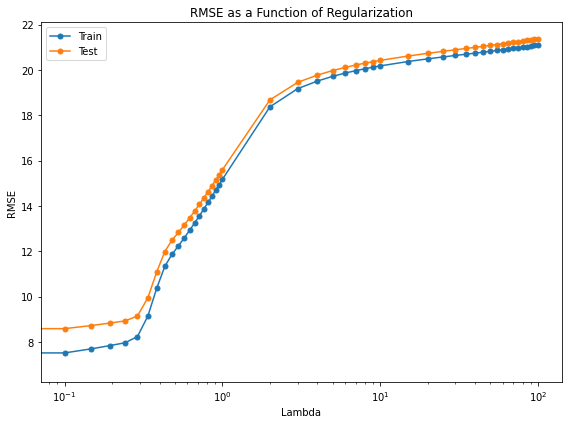

In [118]:
# Turn results into a dataframe
rmse_train_df=pd.DataFrame.from_dict(dict_lbd_rmse_train,orient='index').sort_index().reset_index()
rmse_test_df=pd.DataFrame.from_dict(dict_lbd_rmse_test,orient='index').sort_index().reset_index()
rmse_train_df.columns=['lambda','rmse_train']
rmse_test_df.columns=['lambda','rmse_validation']
merged_rmse=pd.merge(rmse_train_df,rmse_test_df,on='lambda').set_index('lambda')

# Figure
fig, ax = plt.subplots(1, figsize=(8, 6))
merged_rmse['rmse_train'].plot(ax=ax, marker='.', markersize=10, label='Train')
merged_rmse['rmse_validation'].plot(ax=ax, marker='.', markersize=10, label='Test')
ax.set_xscale('log')
ax.yaxis.get_major_formatter().set_scientific(False)
ax.set_xlabel('Lambda')
ax.set_ylabel('RMSE')
ax.set_title('RMSE as a Function of Regularization')
plt.tight_layout()
plt.legend(loc='best')
plt.show()


In [119]:
# Get the optimal value of lambda -- the one associated with the lowest RMSE
merged_rmse.reset_index(inplace=True)
merged_rmse.sort_values('rmse_validation').head()

,lambda,rmse_train,rmse_validation
0,0.000000,6.957971,8.169205
1,0.100000,7.519652,8.589901
2,0.147368,7.698871,8.726230
3,0.194737,7.845643,8.838242
4,0.242105,7.969014,8.932567


In [125]:
# Fit the model using the best value of lambda, get predictions on the test set
x_train = standardize(bdata_train[:,0:13])
x_train = poly.fit_transform(x_train)
x_train = np.c_[np.ones(x_train.shape[0]),x_train]
x_train_tar = bdata_train_tar

x_test = standardize(bdata_test[: ,0:13])
x_test = poly.fit_transform(x_test)
x_test = np.c_[np.ones(x_test.shape[0]),x_test]
x_test_tar = bdata_test_tar

R = 0.01
alpha_int = 0
beta_int = np.zeros(x_train.shape[1]) 
alpha, beta = ridge_regularization(alpha_int, beta_int, x_train, x_train_tar, 3, 1000000, R)
print("lambda={}, R={}".format(lbd, R))
yhat_test = f(x_test, beta)
rmse_test = np.sqrt(mean_squared_error(yhat_test,x_test_tar))
print("RMSE of testing set: {:.2f}\n".format(rmse_test))

lambda=100.0, R=0.01
RMSE of testing set: 20.91



*Discuss your results here*

###  Extra Credit 2: AdaGrad

AdaGrad is a method to implement gradient descent with different learning rates for each feature. Adaptive algorithms like this one are being extensively used especially in neural network training. Implement AdaGrad on 2.3 but now use CRIM, RM and DIS as independent variables. Standardize these variables before inputting them to the gradient descent algorithm. Tune the algorithm until you estimate the regression coefficients within a tolerance of 1e-1. Use mini-batch gradient descent in this implementation. In summary for each parameter (in our case one intercept and three slopes) the update step of the gradient (in this example $\beta_j$) at iteration $k$ of the GD algorithm becomes:

$$\beta_j=\beta_j -\frac{R}{\sqrt{G^{(k)}_j}}\frac{\partial J(\alpha,\beta_1,\ldots)}{\partial \beta_j}$$ where
$G^{(k)}_j=\sum_{i=1}^{k} (\frac{\partial J^{(i)}(\alpha,\beta_1,\ldots)}{\partial \beta_j})^2$ and $R$ is your learning rate. The notation $\frac{\partial J^{(i)}(\alpha,\beta_1,\ldots)}{\partial \beta_j}$ corresponds to the value of the gradient at iteration $(i)$. Essentially we are "storing" information about previous iteration gradients. Doing that we effectively decrease the learning rate slower when a feature $x_i$ is sparse (i.e. has many zero values which would lead to zero gradients). Although this method is not necessary for our regression problem, it is good to be familiar with these methods as they are widely used in neural network training.  

In [ ]:
# Your code here

*Discuss your results here*